# Hello! Welcome to my Pokemon data analysis!

This notebook is going to look at the different Pokemon in Sun and Moon and look at some exciting visualisations! 
Dataset found here: https://www.kaggle.com/mylesoneill/pokemon-sun-and-moon-gen-7-stats
I also went here to add Gen 8 Pokemon and the missing Gen 7 ones manually: https://serebii.net/pokedex-swsh/

In [349]:
#importing the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
#loading in the data, I will be using the pokemon.csv 
df = pd.read_csv('pokemon.csv')
#displaying the head of the data to get an idea
df.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed Pokémon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon


I'm particularly interested in looking at the types of different pokemon and the distributions of stats amongst the pokemon, so there are a lot of columns here that I don't care about. I'll first clean the data and drop all irrelevant columns

In [4]:
#It's fastest to copy and paste the columns I don't want from all the columns here
df.columns

Index(['id', 'ndex', 'species', 'forme', 'type1', 'type2', 'ability1',
       'ability2', 'abilityH', 'hp', 'attack', 'defense', 'spattack',
       'spdefense', 'speed', 'total', 'weight', 'height', 'dex1', 'dex2',
       'class', 'percent-male', 'percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],
      dtype='object')

In [7]:
#dropping the irrelevant columns
df2 = df.drop(['species','ability1',
       'ability2', 'abilityH','dex1', 'dex2',
       'class', 'percent-male','percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],axis = 1)

In [8]:
#this has all the columns I need but still needs to be cleaned
df2.head()

,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,height
0,1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,15.2 lbs.,"2'04"""
1,2,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,28.7 lbs.,"3'03"""
2,3,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,220.5 lbs.,"6'07"""
3,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,18.7 lbs.,"2'00"""
4,5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,41.9 lbs.,"3'07"""


The data needs to be cleaned. For example, type2 is blank for some pokemon so I will need to fill this in with something. Also, the weight and height are currently in string format. There are also multiple entries for the same pokemon as it can have many forms, some should be included but some also shouldn't be.  

In [10]:
#filling in the missing type 2
df2['type2'] = df2['type2'].fillna('none')
df2.head()

,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,height
0,1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,15.2 lbs.,"2'04"""
1,2,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,28.7 lbs.,"3'03"""
2,3,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,220.5 lbs.,"6'07"""
3,4,4,Charmander,Fire,none,39,52,43,60,50,65,309,18.7 lbs.,"2'00"""
4,5,5,Charmeleon,Fire,none,58,64,58,80,65,80,405,41.9 lbs.,"3'07"""


In [11]:
#making the weight variable into decimals
df2['weight'] = df2['weight'].apply(lambda x: float(x.split(' lbs.')[0]))

In [16]:
#making the height variable into inches, currently in feet and inches 
df2['heightft'] = df2['height'].apply(lambda x: float(x.split('"')[0].split("'")[0]))
df2['heightinch'] = df2['height'].apply(lambda x: float(x.split('"')[0].split("'")[1]))
df2['totalinches'] = df2['heightft']*12 + df2['heightinch']
df2.head()

,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,height,heightft,heightinch,totalinches
0,1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,15.2,"2'04""",2.0,4.0,28.0
1,2,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,28.7,"3'03""",3.0,3.0,39.0
2,3,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,220.5,"6'07""",6.0,7.0,79.0
3,4,4,Charmander,Fire,none,39,52,43,60,50,65,309,18.7,"2'00""",2.0,0.0,24.0
4,5,5,Charmeleon,Fire,none,58,64,58,80,65,80,405,41.9,"3'07""",3.0,7.0,43.0


In [17]:
#let's drop all the irrelevant height columns 
df3 = df2.drop(['height','heightft','heightinch'],axis = 1)

Now I am going to check for duplicates by looking at ndex

In [24]:
#pokemon with the same ndex (pokedex number) aren't unqiue
df3['ndex'].value_counts()

201    28
666    20
493    18
773    18
774    14
       ..
516     1
515     1
514     1
513     1
1       1
Name: ndex, Length: 802, dtype: int64

In [46]:
#what pokemon has 28 of the same entry?!
df3[df3['ndex'] == 201]
#looks like it's unknown, we only want one 
df4 = df3.drop_duplicates(subset = 'forme').drop(843)

In [47]:
#who has 20?
df4[df4['ndex'] == 666]
#it's vivillion, only want 1


,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
665,666,666,Vivillon (Icy Snow Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
961,963,666,Vivillon (Polar Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
962,964,666,Vivillon (Tundra Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
963,965,666,Vivillon (Continental Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
964,966,666,Vivillon (Garden Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
965,967,666,Vivillon (Elegant Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
966,968,666,Vivillon (Meadow Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
967,969,666,Vivillon (Modern Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
968,970,666,Vivillon (Marine Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0
969,971,666,Vivillon (Archipelago Pattern),Bug,Flying,80,52,50,90,50,89,411,37.5,47.0


In [59]:
#the index seems to repeat itself, so just resetting it
df5 = df4.reset_index()

In [105]:
df5[df5['ndex'] == 666]
#now need to get rid of all the vivillions
df6 = pd.concat([df5.iloc[:930],df5.iloc[949:]])
df6['ndex'].value_counts() #who is 773 and 493? It's silvally and genesect, which we will keep  
df6 = df6.reset_index()
df6[df6['ndex'] == 774] #this is minior where we only want to keep the first two
df7 = pd.concat([df6.iloc[:991],df6.iloc[998:]])


In [106]:
df7['ndex'].value_counts()

493    18
773    18
676    10
25      7
479     6
       ..
517     1
516     1
515     1
514     1
1       1
Name: ndex, Length: 802, dtype: int64

In [109]:
df7[df7['ndex'] == 774] #only want one 676

,level_0,index,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
773,773,773,774,774,Minior (Meteor Form),Rock,Flying,60,60,100,60,100,60,440,88.2,12.0


In [110]:
df8 = pd.concat([df7.iloc[:943],df7.iloc[952:]])
df8[df8['ndex'] == 676]

,level_0,index,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
675,675,675,676,676,Furfrou (Natural Form),Normal,none,75,80,60,65,90,102,472,61.7,47.0


In [95]:
df8['ndex'].value_counts()
df8[df8['ndex'] == 25] #only want one pikachu


,level_0,index,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
24,24,24,25,25,Pikachu,Electric,none,35,55,40,50,50,90,320,13.2,16.0
811,811,811,813,25,Pikachu (Original Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0
812,812,812,814,25,Pikachu (Hoenn Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0
813,813,813,815,25,Pikachu (Sinnoh Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0
814,814,814,816,25,Pikachu (Unova Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0
815,815,815,817,25,Pikachu (Kalos Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0
816,816,816,818,25,Pikachu (Alola Cap),Electric,none,35,55,40,50,50,90,320,13.2,16.0


In [125]:
df9 = pd.concat([df8.iloc[:811],df8.iloc[817:]])
df9[df9['ndex'] == 25]

,level_0,index,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
24,24,24,25,25,Pikachu,Electric,none,35,55,40,50,50,90,320,13.2,16.0


In [126]:
df9['ndex'].value_counts()

773    18
493    18
479     6
670     6
669     5
       ..
518     1
517     1
516     1
515     1
1       1
Name: ndex, Length: 802, dtype: int64

In [133]:
df9.index.value_counts()
df10 = df9.drop(['level_0'],axis = 1)

In [138]:
df10[df10['ndex'] == 493]

,level_0,index,id,ndex,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total,weight,totalinches
492,492,492,493,493,Arceus (Normal),Normal,none,120,120,120,120,120,120,720,705.5,126.0
889,895,922,924,493,Arceus (Fighting),Fighting,none,120,120,120,120,120,120,720,705.5,126.0
890,896,923,925,493,Arceus (Flying),Flying,none,120,120,120,120,120,120,720,705.5,126.0
891,897,924,926,493,Arceus (Poison),Poison,none,120,120,120,120,120,120,720,705.5,126.0
892,898,925,927,493,Arceus (Ground),Ground,none,120,120,120,120,120,120,720,705.5,126.0
893,899,926,928,493,Arceus (Rock),Rock,none,120,120,120,120,120,120,720,705.5,126.0
894,900,927,929,493,Arceus (Bug),Bug,none,120,120,120,120,120,120,720,705.5,126.0
895,901,928,930,493,Arceus (Ghost),Ghost,none,120,120,120,120,120,120,720,705.5,126.0
896,902,929,931,493,Arceus (Steel),Steel,none,120,120,120,120,120,120,720,705.5,126.0
897,903,930,932,493,Arceus (Fire),Fire,none,120,120,120,120,120,120,720,705.5,126.0


In [148]:
df10 = pd.concat([df10.iloc[:889],df10.iloc[906:]])
df11 = df10.drop(0,axis = 1)

In [170]:
df11['ndex'].value_counts().iloc[7:]

412.0    3
362.0    2
89.0     2
422.0    2
306.0    2
        ..
430.0    1
226.0    1
222.0    1
410.0    1
1.0      1
Name: ndex, Length: 795, dtype: int64

In [168]:
df11[df11['ndex']== 20]

,attack,defense,forme,hp,id,index,level_0,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
19,81.0,60.0,Raticate,55.0,20.0,19.0,19.0,20.0,50.0,70.0,97.0,413.0,28.0,Normal,none,40.8
809,71.0,70.0,Raticate (Alola Form),75.0,811.0,809.0,809.0,20.0,40.0,80.0,77.0,413.0,28.0,Dark,Normal,56.2
810,71.0,70.0,Raticate (1),75.0,812.0,810.0,810.0,20.0,40.0,80.0,77.0,413.0,28.0,Dark,Normal,56.2


In [171]:
df12 = pd.concat([df11.iloc[:810],df11.iloc[811:]])
df12[df12['ndex'] == 412]

,attack,defense,forme,hp,id,index,level_0,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
411,29.0,45.0,Burmy (Plant Cloak),40.0,412.0,411.0,411.0,412.0,29.0,45.0,36.0,224.0,8.0,Bug,none,7.5
870,29.0,45.0,Burmy (Sandy Cloak),40.0,905.0,903.0,876.0,412.0,29.0,45.0,36.0,224.0,8.0,Bug,none,7.5
871,29.0,45.0,Burmy (Trash Cloak),40.0,906.0,904.0,877.0,412.0,29.0,45.0,36.0,224.0,8.0,Bug,none,7.5


In [174]:
df13 = df12.drop('level_0',axis = 1).reset_index()

In [217]:
df13[df13['ndex']==412]
df14 = pd.concat([df13.iloc[:869],df13.iloc[871:]])
df14[df14['ndex'] == 412]
df14['ndex'].value_counts().iloc[27:73]


89.0     2
302.0    2
422.0    2
448.0    2
306.0    2
94.0     2
334.0    2
428.0    2
88.0     2
362.0    2
80.0     2
76.0     2
74.0     2
229.0    2
181.0    2
354.0    2
492.0    2
26.0     2
9.0      2
423.0    2
248.0    2
460.0    2
127.0    2
20.0     2
28.0     2
19.0     2
18.0     2
130.0    2
383.0    2
308.0    2
15.0     2
381.0    2
27.0     2
212.0    2
303.0    2
445.0    2
3.0      2
38.0     2
260.0    2
37.0     2
257.0    2
208.0    2
323.0    2
359.0    2
475.0    2
421.0    2
Name: ndex, dtype: int64

In [220]:
df14[df14['ndex'] == 422]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
421,421,48.0,48.0,Shellos (West Sea),76.0,422.0,421.0,422.0,57.0,62.0,34.0,325.0,12.0,Water,none,13.9
874,875,48.0,48.0,Shellos (East Sea),76.0,910.0,908.0,422.0,57.0,62.0,34.0,325.0,12.0,Water,none,13.9


In [223]:
df15 = df14.drop('level_0',axis = 1).reset_index()
df15[df15['ndex'] == 422]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
421,421,48.0,48.0,Shellos (West Sea),76.0,422.0,421.0,422.0,57.0,62.0,34.0,325.0,12.0,Water,none,13.9
872,874,48.0,48.0,Shellos (East Sea),76.0,910.0,908.0,422.0,57.0,62.0,34.0,325.0,12.0,Water,none,13.9


In [224]:
df16 = pd.concat([df15.iloc[:872],df15.iloc[873:]])
df16[df16['ndex'] == 422]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
421,421,48.0,48.0,Shellos (West Sea),76.0,422.0,421.0,422.0,57.0,62.0,34.0,325.0,12.0,Water,none,13.9


In [300]:
df16['ndex'].value_counts().iloc[45:73]

229.0    2
103.0    2
50.0     2
75.0     2
142.0    2
28.0     2
15.0     2
18.0     2
303.0    2
19.0     2
445.0    2
37.0     2
475.0    2
323.0    2
460.0    2
38.0     2
383.0    2
359.0    2
27.0     2
423.0    2
20.0     2
26.0     2
3.0      2
421.0    2
9.0      2
492.0    2
319.0    2
287.0    1
Name: ndex, dtype: int64

In [323]:
df16[df16['ndex'] == 423]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
422,422,83.0,68.0,Gastrodon (West Sea),111.0,423.0,422.0,423.0,92.0,82.0,39.0,475.0,35.0,Water,Ground,65.9
873,875,83.0,68.0,Gastrodon (East Sea),111.0,911.0,909.0,423.0,92.0,82.0,39.0,475.0,35.0,Water,Ground,65.9


In [326]:
df17 = df16.drop('level_0',axis = 1).reset_index()

In [327]:
df17[df17['ndex'] == 423]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
422,422,83.0,68.0,Gastrodon (West Sea),111.0,423.0,422.0,423.0,92.0,82.0,39.0,475.0,35.0,Water,Ground,65.9
872,873,83.0,68.0,Gastrodon (East Sea),111.0,911.0,909.0,423.0,92.0,82.0,39.0,475.0,35.0,Water,Ground,65.9


In [328]:
df18 = pd.concat([df17.iloc[:872],df17.iloc[873:]])

In [332]:
df18[df18['ndex'] == 421]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
420,420,60.0,70.0,Cherrim (Overcast Form),70.0,421.0,420.0,421.0,87.0,78.0,85.0,450.0,20.0,Grass,none,20.5
871,871,60.0,70.0,Cherrim (Sunshine Form),70.0,909.0,907.0,421.0,87.0,78.0,85.0,450.0,20.0,Grass,none,20.5


In [339]:
df19 = df18.drop('level_0',axis = 1).reset_index()
df19[df19['ndex'] == 423]

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
422,422,83.0,68.0,Gastrodon (West Sea),111.0,423.0,422.0,423.0,92.0,82.0,39.0,475.0,35.0,Water,Ground,65.9


,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
318,318,120.0,40.0,Sharpedo,70.0,319.0,318.0,319.0,95.0,40.0,95.0,460.0,71.0,Water,Dark,195.8
850,850,140.0,70.0,Sharpedo (Mega Sharpedo),70.0,886.0,884.0,319.0,110.0,65.0,105.0,560.0,98.0,Water,Dark,287.3


In [340]:
df19

,level_0,attack,defense,forme,hp,id,index,ndex,spattack,spdefense,speed,total,totalinches,type1,type2,weight
0,0,49.0,49.0,Bulbasaur,45.0,1.0,0.0,1.0,65.0,65.0,45.0,318.0,28.0,Grass,Poison,15.2
1,1,62.0,63.0,Ivysaur,60.0,2.0,1.0,2.0,80.0,80.0,60.0,405.0,39.0,Grass,Poison,28.7
2,2,82.0,83.0,Venusaur,80.0,3.0,2.0,3.0,100.0,100.0,80.0,525.0,79.0,Grass,Poison,220.5
3,3,52.0,43.0,Charmander,39.0,4.0,3.0,4.0,60.0,50.0,65.0,309.0,24.0,Fire,none,18.7
4,4,64.0,58.0,Charmeleon,58.0,5.0,4.0,5.0,80.0,65.0,80.0,405.0,43.0,Fire,none,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,65.0,107.0,Rotom (Frost Rotom),50.0,919.0,917.0,479.0,105.0,107.0,86.0,520.0,12.0,Electric,Ice,0.7
880,881,65.0,107.0,Rotom (Fan Rotom),50.0,920.0,918.0,479.0,105.0,107.0,86.0,520.0,12.0,Electric,Flying,0.7
881,882,65.0,107.0,Rotom (Mow Rotom),50.0,921.0,919.0,479.0,105.0,107.0,86.0,520.0,12.0,Electric,Grass,0.7
882,883,120.0,100.0,Giratina (Origin Forme),150.0,922.0,920.0,487.0,120.0,100.0,90.0,680.0,272.0,Ghost,Dragon,1433.0


In [342]:
df19['type1'] = df19['type1'].apply(lambda x: x[0:3])
df19['type1']

0      Gra
1      Gra
2      Gra
3      Fir
4      Fir
      ... 
879    Ele
880    Ele
881    Ele
882    Gho
883    Gra
Name: type1, Length: 884, dtype: object

Text(0.5, 1.0, 'Base Stat Total Distribution by Type')

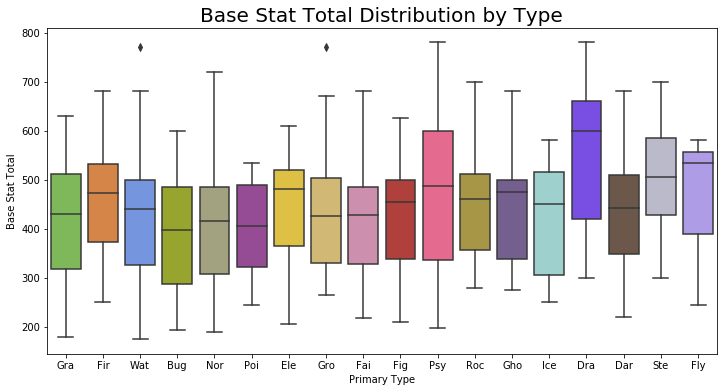

In [348]:
colors = ['#7AC74C','#EE8130','#6390F0','#A6B91A','#A8A77A','#A33EA1','#F7D02C','#E2BF65','#D685AD','#C22E28','#F95587','#B6A136','#735797','#96D9D6','#6F35FC','#705746','#B7B7CE','#A98FF3']
plt.figure(figsize= (12,6))
sns.boxplot(data = df19,x = 'type1',y = 'total',palette = colors)
plt.xlabel('Primary Type')
plt.ylabel('Base Stat Total')
plt.title('Base Stat Total Distribution by Type',fontdict = {'fontsize':20})